In [40]:
library(tidyverse)
library(NbClust)
library(cluster)
library(factoextra)
library(FactoMineR)

ggplot2::theme_set(theme_classic())

In [2]:
league_df <- read.csv("C:/league_df.csv", stringsAsFactors = TRUE)

In [26]:
colnames(league_df)

[1] "ID"               "Name"             "Age"             
  [4] "OVA"              "Nationality"      "Club"            
  [7] "BOV"              "BP"               "Position"        
 [10] "Player.Photo"     "Club.Logo"        "Flag.Photo"      
 [13] "POT"              "X111648"          "feet"            
 [16] "inches"           "Weight"           "foot"            
 [19] "Growth"           "Joined"           "Loan.Date.End"   
 [22] "Value"            "Wage"             "Release.Clause"  
 [25] "Contract"         "Attacking"        "Crossing"        
 [28] "Finishing"        "Heading.Accuracy" "Short.Passing"   
 [31] "Volleys"          "Skill"            "Dribbling"       
 [34] "Curve"            "FK.Accuracy"      "Long.Passing"    
 [37] "Ball.Control"     "Movement"         "Acceleration"    
 [40] "Sprint.Speed"     "Agility"          "Reactions"       
 [43] "Balance"          "Power"            "Shot.Power"      
 [46] "Jumping"          "Stamina"          "Strength"        
 [49] "Long.Shots"       "Mentality"        "Aggression"      
 [52] "Interceptions"    "Positioning"      "Vision"          
 [55] "Penalties"        "Composure"        "Defending"       
 [58] "Marking"          "Standing.Tackle"  "Sliding.Tackle"  
 [61] "Goalkeeping"      "GK.Diving"        "GK.Handling"     
 [64] "GK.Kicking"       "GK.Positioning"   "GK.Reflexes"     
 [67] "Total.Stats"      "Base.Stats"       "W.F"             
 [70] "SM"               "A.W"              "D.W"             
 [73] "IR"               "PAC"              "SHO"             
 [76] "PAS"              "DRI"              "DEF"             
 [79] "PHY"              "Hits"             "LS"              
 [82] "ST"               "RS"               "LW"              
 [85] "LF"               "CF"               "RF"              
 [88] "RW"               "LAM"              "CAM"             
 [91] "RAM"              "LM"               "LCM"             
 [94] "CM"               "RCM"              "RM"              
 [97] "LWB"              "LDM"              "CDM"             
[100] "RDM"              "RWB"              "LB"              
[103] "LCB"              "CB"               "RCB"             
[106] "RB"               "GK"               "Gender"          
[109] "Height"           "Value_1"          "Wage_1"          
[112] "League"           "BP2"

### Attacking Stats

In [4]:
league_df[, 26:31] %>% head

,Attacking,Crossing,Finishing,Heading.Accuracy,Short.Passing,Volleys
,<int>,<int>,<int>,<int>,<int>,<int>
1,313,75,50,59,71,58
2,380,90,70,60,85,75
3,304,72,31,75,71,55
4,394,83,65,72,89,85
5,315,73,36,69,74,63
6,206,20,28,81,54,23


### Skill Stats

In [5]:
league_df[, 32:37] %>% head

,Skill,Dribbling,Curve,FK.Accuracy,Long.Passing,Ball.Control
,<int>,<int>,<int>,<int>,<int>,<int>
1,338,73,65,60,69,71
2,402,77,87,78,81,79
3,258,44,56,33,61,64
4,393,75,74,67,90,87
5,283,53,45,41,72,72
6,173,40,19,15,44,55


### Movement Stats

In [6]:
league_df[, 38:43] %>% head

,Movement,Acceleration,Sprint.Speed,Agility,Reactions,Balance
,<int>,<int>,<int>,<int>,<int>,<int>
1,347,68,74,68,69,68
2,337,59,60,72,76,70
3,324,64,70,51,72,67
4,338,53,53,68,82,82
5,321,52,51,65,83,70
6,321,61,68,44,68,80


### Power Stats

In [7]:
league_df[, 44:49] %>% head

,Power,Shot.Power,Jumping,Stamina,Strength,Long.Shots
,<int>,<int>,<int>,<int>,<int>,<int>
1,347,74,68,69,68,68
2,310,71,59,48,61,71
3,284,47,70,65,74,28
4,333,88,64,34,63,84
5,349,77,71,61,76,64
6,319,57,85,64,87,26


### Mentality Stats

In [8]:
league_df[, 50:56] %>% head

,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,320,72,69,63,66,50,61
2,358,60,47,78,83,90,61
3,319,87,85,45,70,32,61
4,417,87,79,83,91,77,61
5,335,78,83,48,57,69,61
6,296,84,77,41,57,37,61


### Defending Stats

In [9]:
league_df[, 57:60] %>% head

,Defending,Marking,Standing.Tackle,Sliding.Tackle
,<int>,<int>,<int>,<int>
1,208,70,69,69
2,120,26,43,51
3,242,78,81,83
4,143,58,49,36
5,224,77,75,72
6,222,72,77,73


### Goalkeeping Stats

In [10]:
league_df[, 61:66] %>% head

,Goalkeeping,GK.Diving,GK.Handling,GK.Kicking,GK.Positioning,GK.Reflexes
,<int>,<int>,<int>,<int>,<int>,<int>
1,56,14,5,15,10,12
2,32,10,5,7,5,5
3,43,12,9,5,6,11
4,47,7,12,5,15,8
5,41,10,7,12,5,7
6,44,11,7,12,5,9


### Foot

In [11]:
league_df$foot <- league_df$foot %>% as.numeric - 1
head(league_df$foot)

[1] 0 0 1 1 1 1

### Data for K-Means Cluster

In [12]:
league_df_c <- league_df[c(which(colnames(league_df) %in% c("foot", "Height", "Weight")),
                    27:31, 33:37, 39:43, 45:49, 51:56, 58:60, 62:66)] %>% scale
head(league_df_c)

Weight,foot,Height,Crossing,Finishing,Heading.Accuracy,Short.Passing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,Standing.Tackle,Sliding.Tackle,GK.Diving,GK.Handling,GK.Kicking,GK.Positioning,GK.Reflexes
0.84270337,-1.7072575,0.08926233,1.0043338,-0.005013885,0.1121892,0.3931987,0.510249,0.5777518,0.5829927,...,-0.1298504,-0.3199184,0.8244603,0.6863446,0.80404150,-0.1388187,-0.6228130,-0.07728738,-0.35021905,-0.2488648
-0.67531499,-1.7072575,-0.68077546,1.7629227,0.939848716,0.1654285,1.3094924,1.382723,0.7784218,1.6913364,...,2.2426334,-0.3199184,-1.1650120,-0.4201541,0.03041713,-0.3482128,-0.6228130,-0.52150464,-0.61857563,-0.6084171
0.39994801,0.5855685,-0.68077546,0.8526160,-0.902633355,0.9640174,0.3931987,0.356283,-0.8771054,0.1295793,...,-1.1974681,-0.3199184,1.1861826,1.1970363,1.40574935,-0.2435157,-0.4048972,-0.63255896,-0.56490431,-0.3002294
-0.67531499,0.5855685,-1.83583215,1.4089145,0.703633065,0.8042996,1.5712906,1.895943,0.6780868,1.0364060,...,1.4715761,-0.3199184,0.2818770,-0.1648082,-0.61426985,-0.5052583,-0.2414604,-0.63255896,-0.08186247,-0.4543233
0.02044342,0.5855685,-0.29575657,0.9031886,-0.666417705,0.6445818,0.5895474,0.766859,-0.4255980,-0.4245925,...,0.9970794,-0.3199184,1.1409673,0.9416905,0.93297890,-0.3482128,-0.5138551,-0.24386885,-0.61857563,-0.5056879
1.41196025,0.5855685,0.85930011,-1.7771588,-1.044362746,1.2834530,-0.7194436,-1.286021,-1.0777754,-1.7344533,...,-0.9009076,-0.3199184,0.9148909,1.0268058,0.97595803,-0.2958642,-0.5138551,-0.24386885,-0.61857563,-0.4029586


### K-Means Clustering with Elbow

Warning message:
"did not converge in 10 iterations"


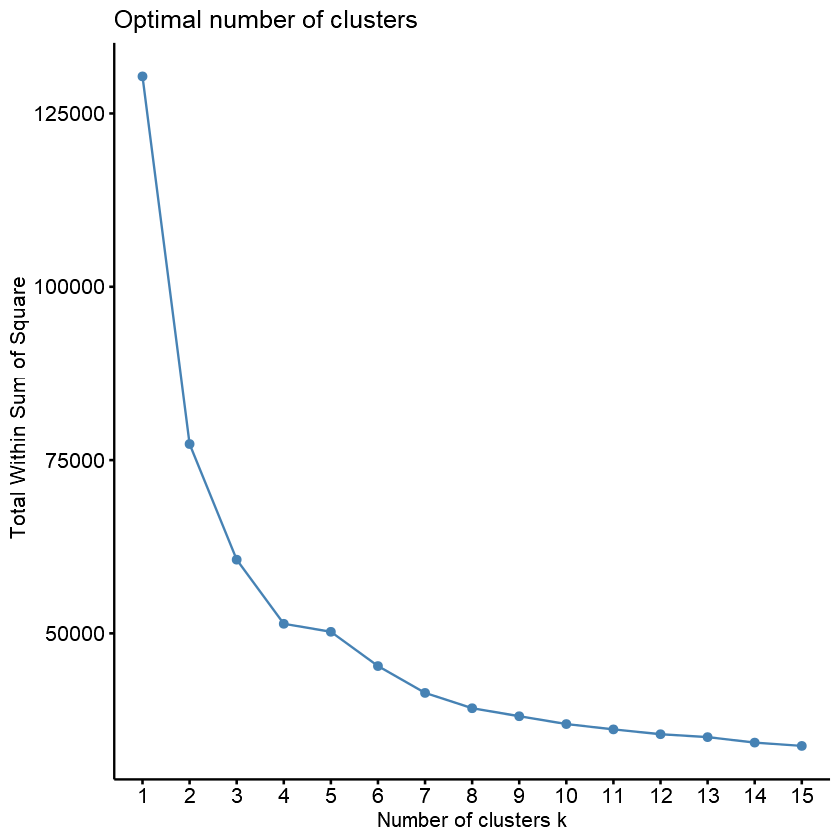

In [16]:
fviz_nbclust(league_df_c, kmeans, k.max = 15, method = "wss")

### Elbow Point = 4

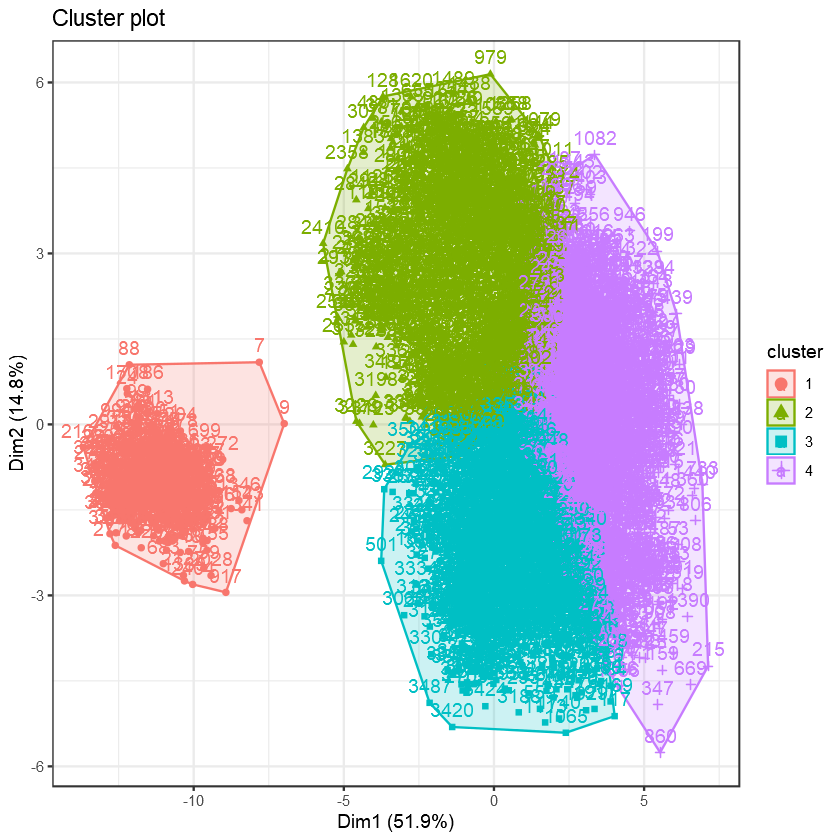

In [224]:
k4 <- kmeans(league_df_c, 4)

fviz_cluster(k4, data = league_df_c) + theme_bw()

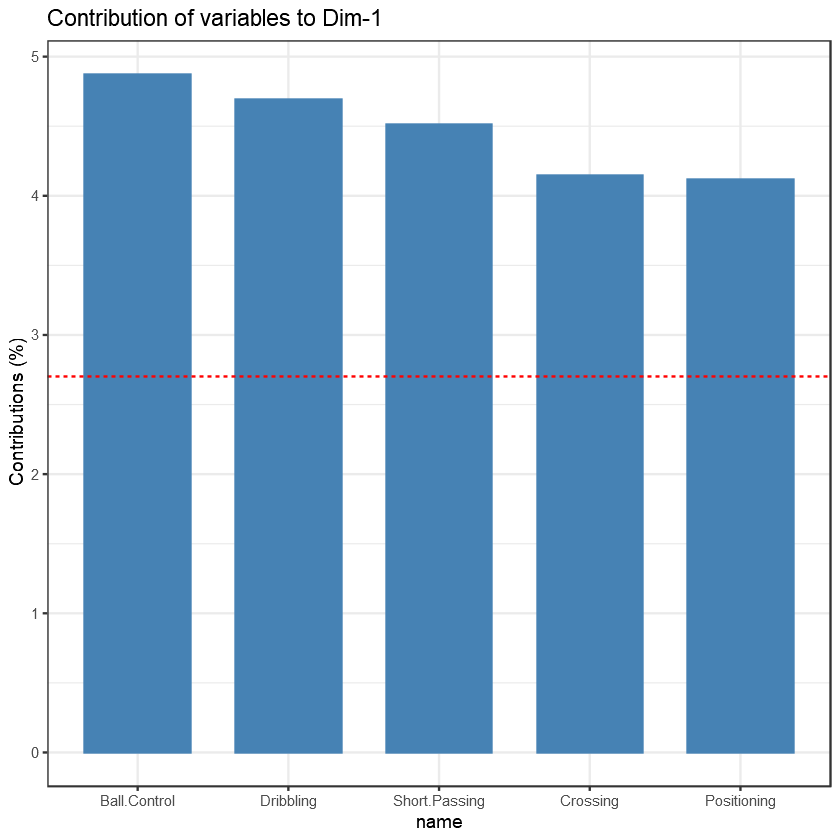

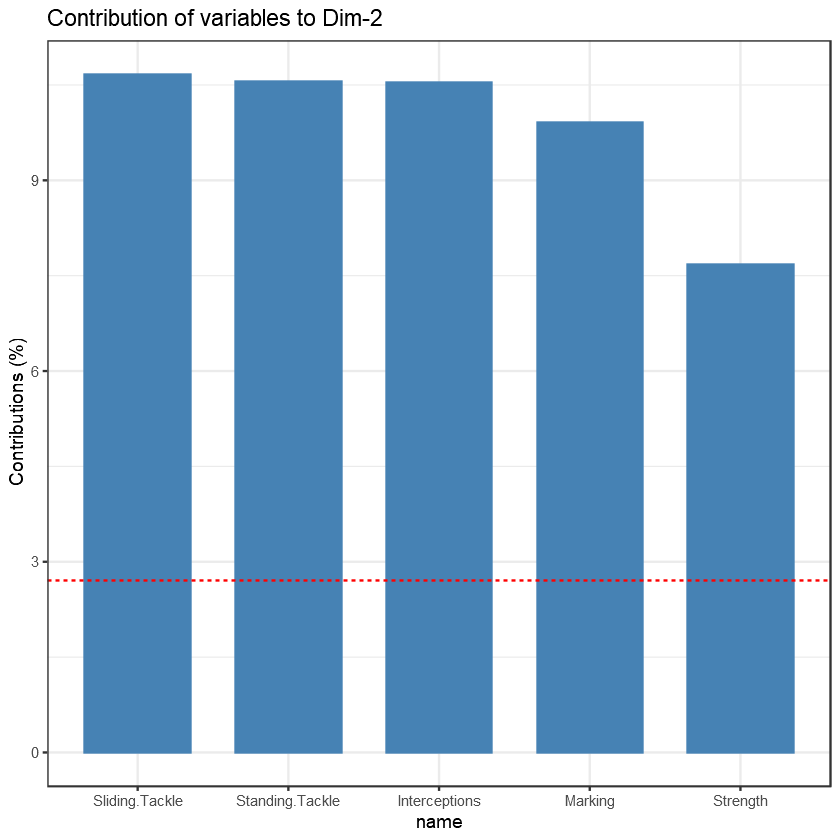

In [470]:
pca <- PCA(league_df_c, graph = FALSE)
fviz_contrib(pca, choice = "var", axes = 1, top = 5) + theme_bw()
fviz_contrib(pca, choice = "var", axes = 2, top = 5) + theme_bw()

### Cluster 1

In [452]:
library(fmsb)
library(RColorBrewer)
library(scales)

In [462]:
league_df['Cluster'] <- k4$cluster

posit_abil_max <- league_df %>%
    select(foot, Height, Weight, Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping) %>%
    summarise_all(max) %>% head

Cluster1 <- league_df %>%
    filter(Cluster == 1) %>%
    select(foot, Height, Weight, Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping) %>%
    summarise_all(mean)

Cluster2 <- league_df %>%
    filter(Cluster == 2) %>%
    select(foot, Height, Weight, Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping) %>%
    summarise_all(mean)

Cluster3 <- league_df %>%
    filter(Cluster == 3) %>%
    select(foot, Height, Weight, Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping) %>%
    summarise_all(mean)

Cluster4 <- league_df %>%
    filter(Cluster == 4) %>%
    select(foot, Height, Weight, Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping) %>%
    summarise_all(mean)

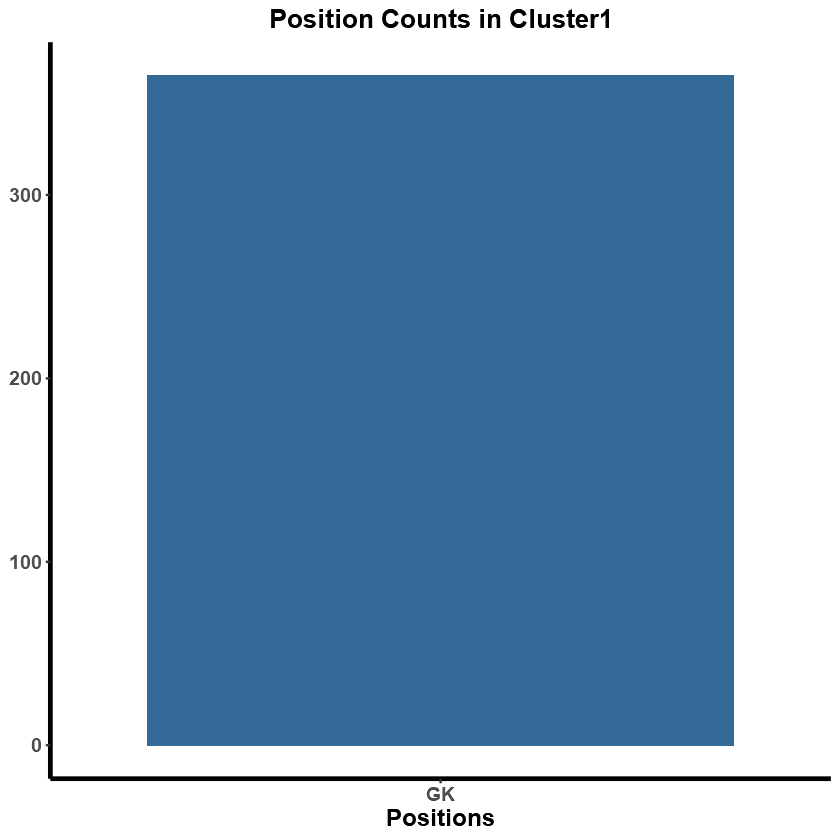

integer(0)

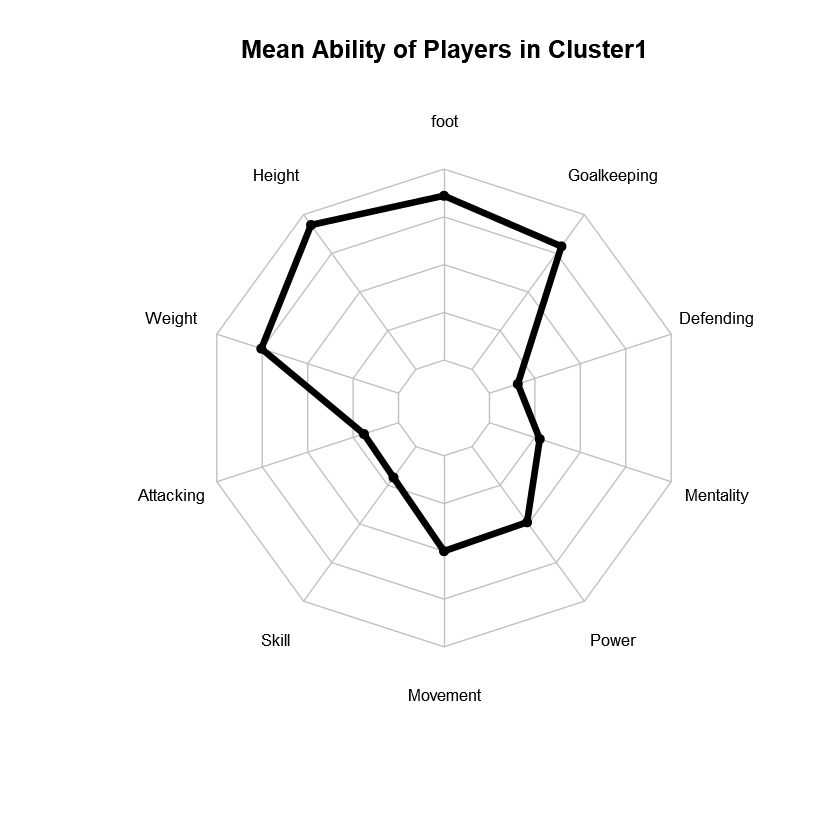

In [466]:
league_df %>%
    filter(Cluster == 1) %>%
    group_by(BP) %>% count() %>%
    ggplot(aes(BP, n, fill = n)) + geom_col() + 
    ggtitle("Position Counts in Cluster1") + xlab("Positions") + 
    theme(legend.position = "none",
        axis.title.y = element_blank(),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

radarchart(bind_rows(rbind(posit_abil_max, rep(0, 10)), Cluster1), 
           axistype = 0, maxmin = T,
           plwd = 4, plty = 1.5 ,
           cglcol = "grey", cglty = 1, axislabcol = "black", cglwd = 0.8,
           vlcex = 0.8) + 
            title("Mean Ability of Players in Cluster1")

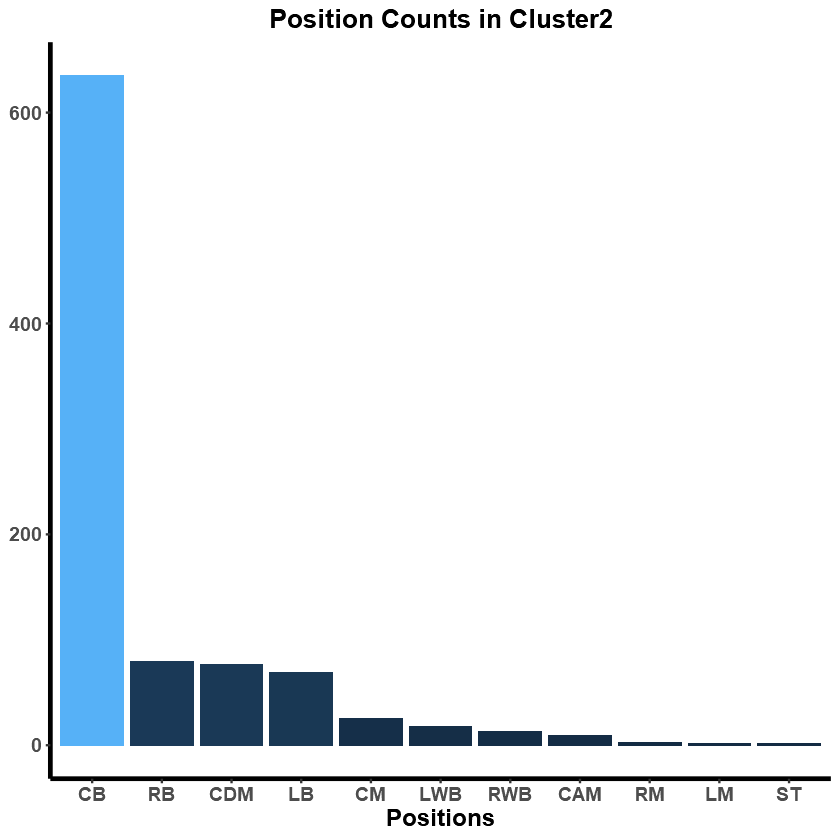

integer(0)

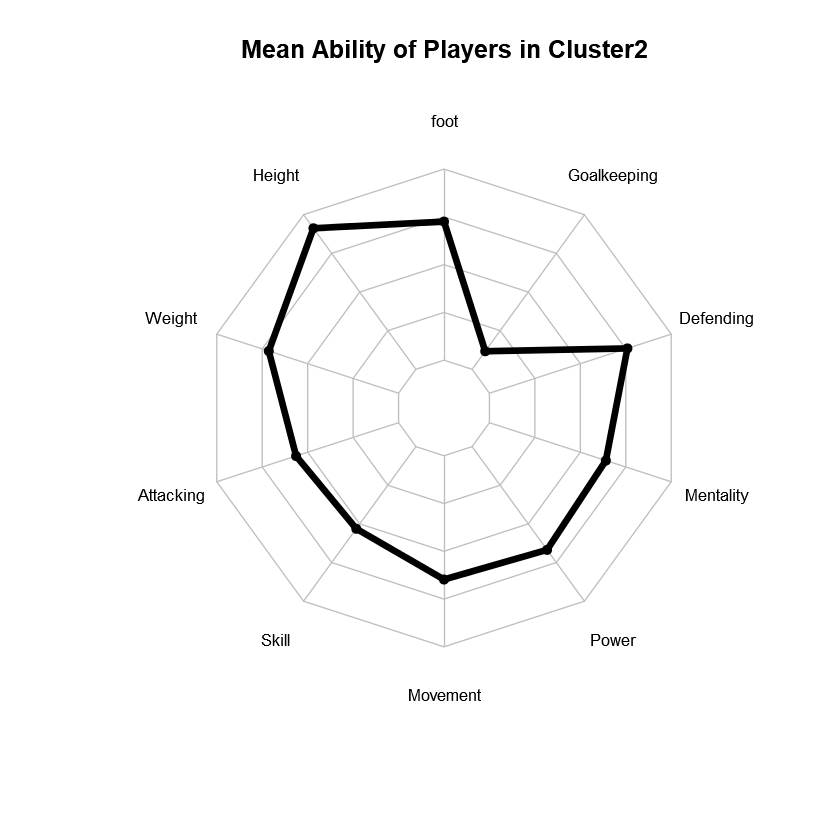

In [467]:
league_df %>%
    filter(Cluster == 2) %>%
    group_by(BP) %>% count() %>%
    ggplot(aes(fct_reorder(BP, -n), n, fill = n)) + geom_col() +
    ggtitle("Position Counts in Cluster2") + xlab("Positions") + 
    theme(legend.position = "none",
        axis.title.y = element_blank(),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

radarchart(bind_rows(rbind(posit_abil_max, rep(0, 10)), Cluster2), 
           axistype = 0, maxmin = T,
           plwd = 4, plty = 1.5 ,
           cglcol = "grey", cglty = 1, axislabcol = "black", cglwd = 0.8,
           vlcex = 0.8) + 
            title("Mean Ability of Players in Cluster2")

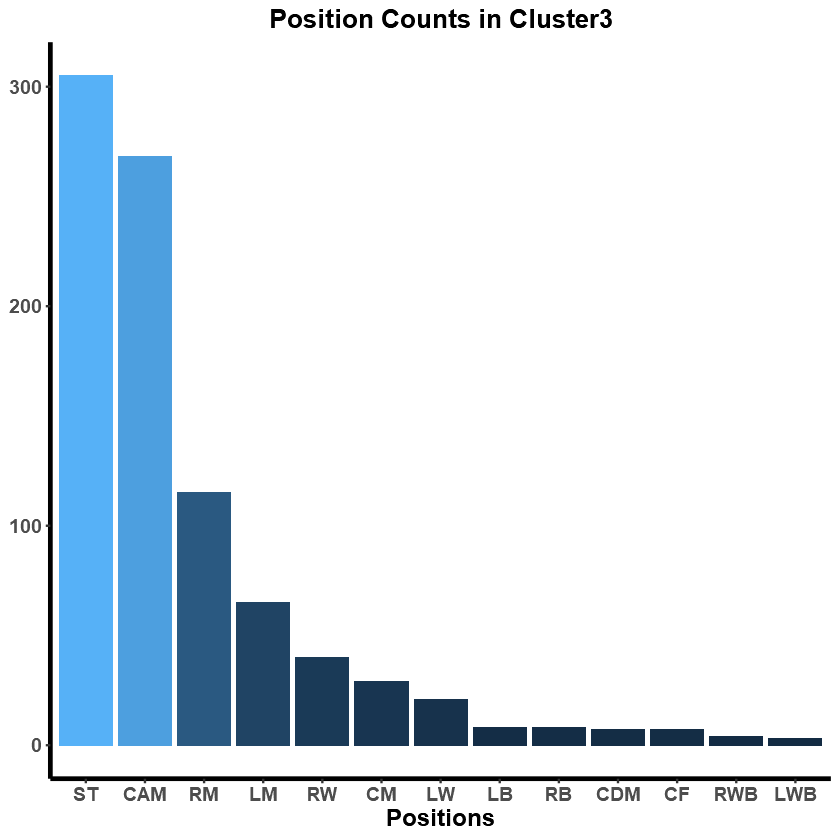

integer(0)

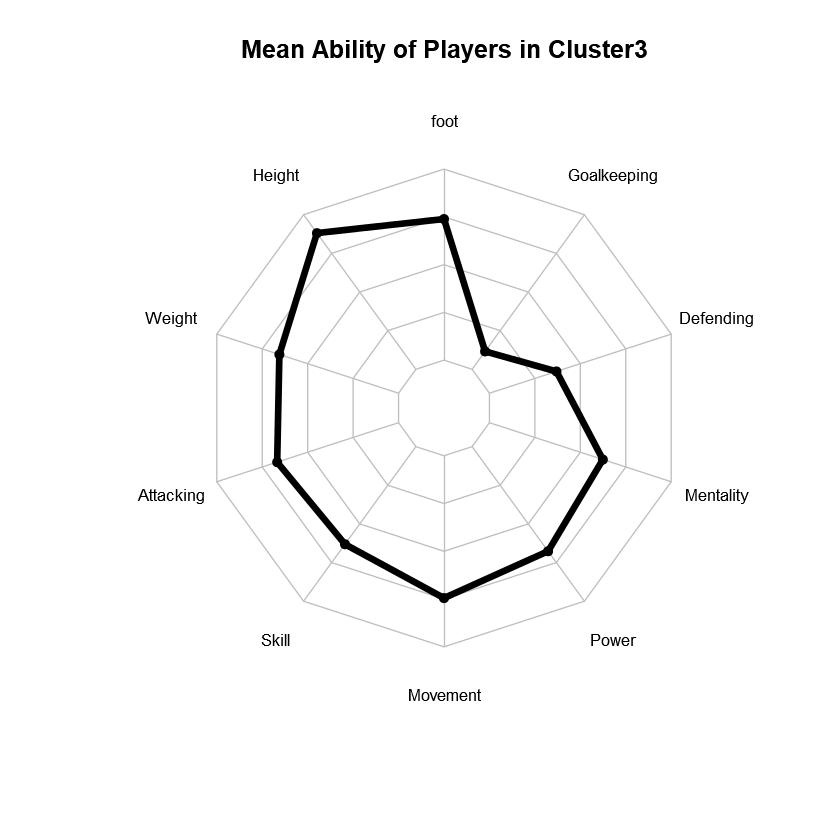

In [468]:
league_df %>%
    filter(Cluster == 3) %>%
    group_by(BP) %>% count() %>%
    ggplot(aes(fct_reorder(BP, -n), n, fill = n)) + geom_col() +
    ggtitle("Position Counts in Cluster3") + xlab("Positions") + 
    theme(legend.position = "none",
        axis.title.y = element_blank(),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1)) 

radarchart(bind_rows(rbind(posit_abil_max, rep(0, 10)), Cluster3), 
           axistype = 0, maxmin = T,
           plwd = 4, plty = 1.5 ,
           cglcol = "grey", cglty = 1, axislabcol = "black", cglwd = 0.8,
           vlcex = 0.8) + 
            title("Mean Ability of Players in Cluster3")

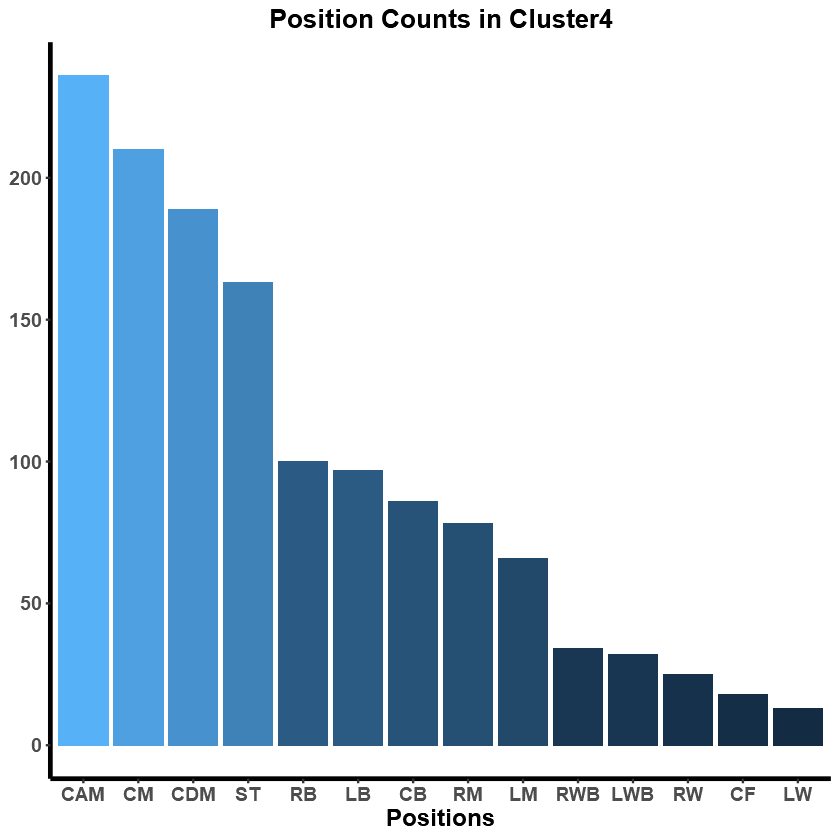

integer(0)

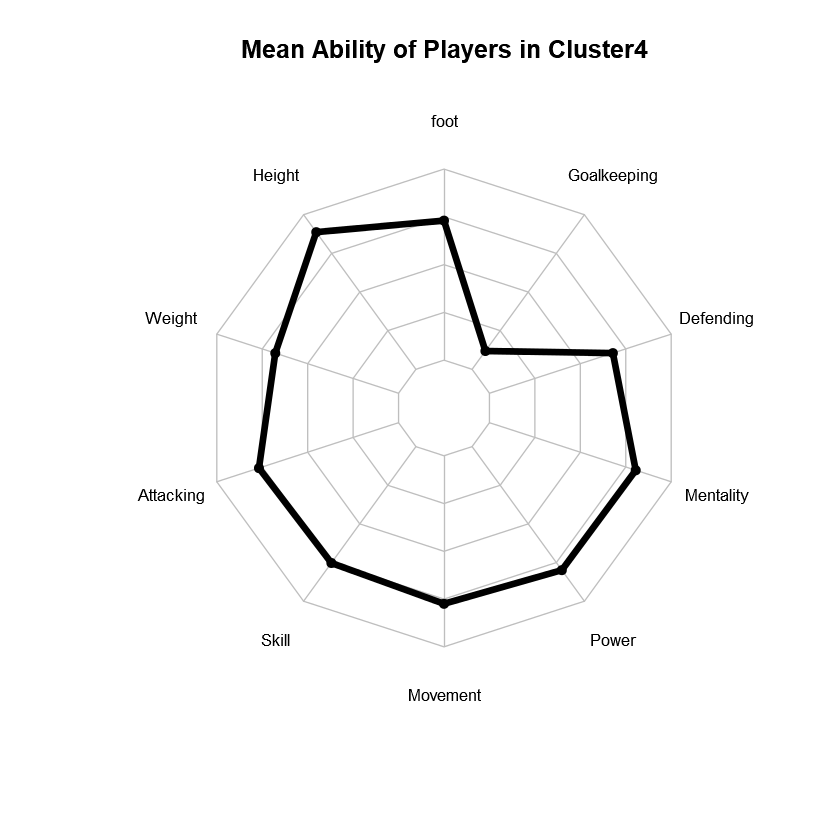

In [469]:
league_df %>%
    filter(Cluster == 4) %>%
    group_by(BP) %>% count() %>%
    ggplot(aes(fct_reorder(BP, -n), n, fill = n)) + geom_col() +
    ggtitle("Position Counts in Cluster4") + xlab("Positions") + 
    theme(legend.position = "none",
        axis.title.y = element_blank(),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, face = "bold"),
        plot.title = element_text(size = 15, hjust = 0.5, face = "bold"),
        axis.line.x.bottom = element_line(color = "black", size = 1),
        axis.line.y.left = element_line(color = "black", size = 1))

radarchart(bind_rows(rbind(posit_abil_max, rep(0, 10)), Cluster4), 
           axistype = 0, maxmin = T,
           plwd = 4, plty = 1.5 ,
           cglcol = "grey", cglty = 1, axislabcol = "black", cglwd = 0.8,
           vlcex = 0.8) + 
            title("Mean Ability of Players in Cluster4")